<h4>Importing modules

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math

<h4>Reading dataset

In [5]:
df = pd.read_csv("dataset/Position_Salaries.csv")
df.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


<h4>Data Visualization

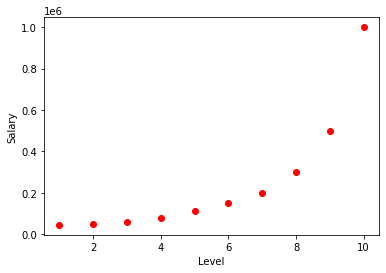

In [6]:
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(df.Level,df.Salary, color='red')

<h4>Preparing dependent and independent variable

In [7]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2:].values

<h4>Split the Dataset into Training and Test Dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=False)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7, 1) (3, 1) (7, 1) (3, 1)


<h4> Creating and Training the Model for Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
LinearModel=LinearRegression()
LinearModel.fit(X_train,y_train)

LinearRegression()

<h4> Plotting Best Fit line for Simple Linear Regression

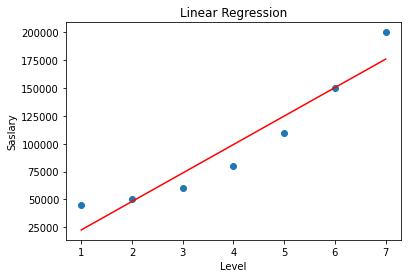

In [46]:
plt.scatter(X_train, y_train)
plt.plot(X_train,LinearModel.predict(X_train), color='r')
plt.title('Linear Regression')
plt.xlabel('Level')
plt.ylabel('Saslary')
plt.show()

<h4> Importing Polynomial features

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly= poly.fit_transform(X_train)
x_poly
# here x_poly = a0 + a1x1 + a2x1^2

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.]])

<h4> Creating and Training the model for Polynomial Linear Regression

In [48]:
PolyModel=LinearRegression()
PolyModel.fit(x_poly,y_train)
y_predict=PolyModel.predict(poly.fit_transform(X_train))

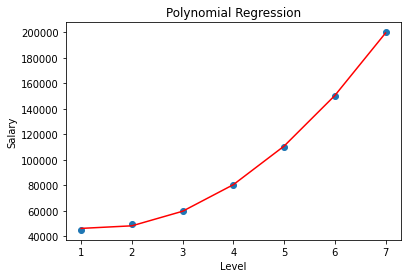

In [49]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_predict, color='r')
plt.title('Polynomial Regression') 
plt.xlabel('Level') 
plt.ylabel('Salary') 
plt.show() 

### Performance of Simple Linear Regression

In [50]:
#Predicted Salary from test dataset w.r.t Simple Linear Regression
y_predict_slr = LinearModel.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
#Model Evaluation using R-Square for Simple Linear Regression
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error of Simple Linear Regression:', r_square)


R-Square Error of Simple Linear Regression: -1.4731579915620094


In [35]:
from sklearn.metrics import mean_squared_error
MSE_L = mean_squared_error(y_test, y_predict_slr)
MSE_L

214340359268.7075

In [36]:
RMSE_L = math.sqrt(MSE_L)
RMSE_L

# RMSE is the standard deviation of the errors which occur when a prediction is made.
# This is same as MSE but the root of the value is considered while determining the 
# accuracy of the model

462969.06945141323

In [37]:
from sklearn.metrics import mean_absolute_error
MAE_L = mean_absolute_error(y_test, y_predict_slr)
MAE_L

# Absolute difference means if the result is negative sign, it is ignored. MAE takes the average of
# this error from every sample

373035.7142857143

### Performance of Polynomial Linear Regression

In [51]:
y_predict_pr = PolyModel.predict(poly.fit_transform(X_test))


from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error of Polynomial Regression is:', r_square)


R-Square Error of Polynomial Regression is: -0.49457292211756454


In [52]:
from sklearn.metrics import mean_squared_error
MSE_P = mean_squared_error(y_test, y_predict_pr)
MSE_P

129529653250.18892

In [53]:
RMSE_P = math.sqrt(MSE_P)
RMSE_P

359902.28291883465

In [54]:
MAE_P = mean_absolute_error(y_test, y_predict_pr)
MAE_P

271150.79365079355